## Artificial Neural Network (ANN) Regression


In [4]:
# Imports
import numpy as np

import torch
import torch.nn as nn

# Pytorch Gpu Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

import matplotlib.pyplot as plt

# Matplotlib svg plots for better pictures
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

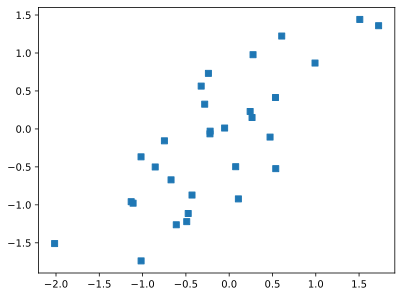

In [5]:
# Create Data
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) / 2

# Plot the values
plt.plot(x.cpu(), y.cpu(), "s")
plt.show()

In [6]:
# Build the model
ANN_reg = nn.Sequential(
    nn.Linear(1, 1),  # This is the Input layer
    nn.ReLU(),  # Activation Function
    nn.Linear(1, 1),  # This the Output Layer
)

ANN_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [7]:
# Learning Rate
lr = 0.05

# Loss Function
loss_fun = nn.MSELoss()

# Optimizer (Gradient Descent flavour to implement)
optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=lr)

In [8]:
# Model training
n_epoch = 500
losses = torch.zeros(n_epoch)

for epoch in range(n_epoch):

    # Forward Propogation
    y_hat = ANN_reg(x)

    # Compute Loss
    loss = loss_fun(y_hat, y)
    losses[epoch] = loss

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

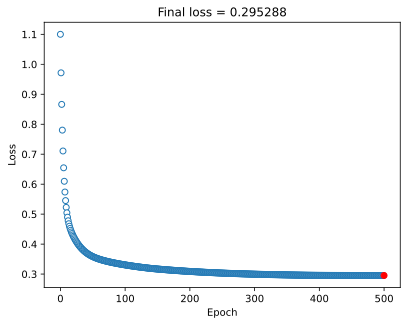

In [9]:
# Show the losses

# Final forward pass
predictions = ANN_reg(x)

# Final Loss
test_loss = (predictions - y).pow(2).mean()

plt.plot(losses.cpu().detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(n_epoch, test_loss.cpu().detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final loss = %g" % test_loss.item())
plt.show()

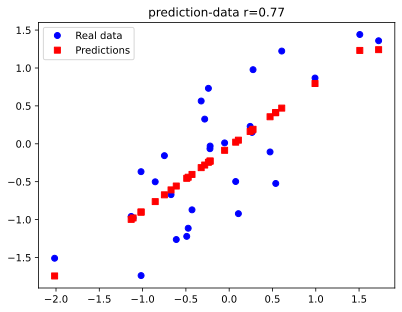

In [10]:
plt.plot(x.cpu(), y.cpu(), "bo", label="Real data")
plt.plot(x.cpu(), predictions.cpu().detach(), "rs", label="Predictions")
plt.title(
    f"prediction-data r={np.corrcoef(y.cpu().T,predictions.cpu().detach().T)[0,1]:.2f}"
)
plt.legend()
plt.show()

### ANN Clean Code


In [ ]:
# Define a function to train the model and output the losses predictions, final loss avg and Model
def nnModel(x, y, n_epoches, lr):
    # Losses Place Holder
    losses = torch.zeros(n_epoches)

    # Model
    ANN_reg = nn.Sequential(nn.Linear(1, 1), nn.ReLU(), nn.Linear(1, 1))

    # Loss Function
    loss_func = nn.MSELoss()
    # Optimizer
    optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=lr)

    # Model Training
    for epoch in range(n_epoches):
        y_hat = ANN_reg(x)
        loss = loss_func(y_hat, y)
        losses[epoch] = loss

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    ## Predictions
    predictions = ANN_reg(x)

    return losses.cpu().detach(), predictions.cpu().detach()

In [74]:
# Define a function to generate x and y for the given number of N
def generateData(N, m):
    x = torch.randn(N, 1)
    y = (m * x) + (torch.randn(N, 1) / 2)

    return x, y

In [76]:
# Define a function to plot the data, loss and accuracy
def plot_data(x, y, m, results):
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    # Plot the raw data
    ax[0].plot(x.cpu(), y.cpu(), "s")
    ax[1].plot(
        m, np.mean(results[:, :, 0], axis=1), "ko-", markerfacecolor="w", markersize=10
    )
    ax[1].set_xlabel("Slope")
    ax[1].set_title("Loss")

    ax[2].plot(
        m, np.mean(results[:, :, 1], axis=1), "ms-", markerfacecolor="w", markersize=10
    )
    ax[2].set_xlabel("Slope")
    ax[2].set_ylabel("Real-predicted correlation")
    ax[2].set_title("Model performance")

    plt.show()

In [ ]:
# Test the model
def run_exp_n_times(n):
    N = 500
    m_arr = np.linspace(-2, 2, 21)
    n_epoches = 500
    lr = 0.01
    results = np.zeros((len(m_arr), n, 2))
    for m_index, m_value in enumerate(m_arr):
        for i in range(n):
            m = m_value
            x, y = generateData(N, m)
            losses, predictions = nnModel(x, y, n_epoches, lr)
            results[m_index, i, 0] = losses[-1]
            results[m_index, i, 1] = np.corrcoef(y.cpu().detach().T, predictions.T)[
                0, 1
            ]
    results[np.isnan(results)] = 0
    return results, m_arr

/kumar/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/kumar/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


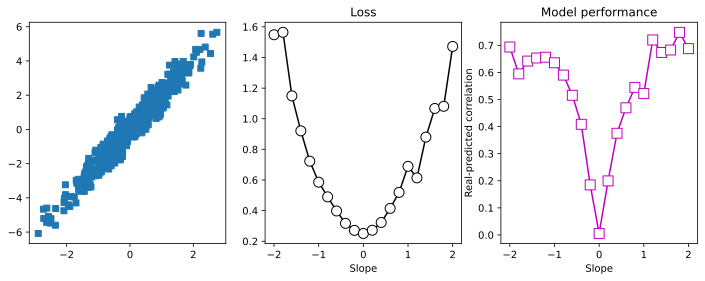

In [ ]:
# Run the model 50 times then to see the average
results, m_arr = run_exp_n_times(2)

# Plot the data
plot_data(x, y, m_arr, results)